In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data_2023 = pd.read_csv('COUN_sep-feb 2023.csv', delimiter=',')
data_2024 = pd.read_csv('COUNTRY HOUSE 2024.csv', delimiter=',')

/var/folders/kt/r21h4r1j28xgpcsbx35gbs7h0000gn/T/ipykernel_53717/2369738257.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv('COUN_sep-feb 2023.csv', delimiter=',')


In [9]:
# Объединение столбцов Date и Time и преобразование в формат даты-времени
data_2023['Date_Time'] = pd.to_datetime(data_2023['Date'] + ' ' + data_2023['Time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
data_2024['Date_Time'] = pd.to_datetime(data_2024['Date'] + ' ' + data_2024['Time'], format='%d.%m.%Y %H:%M:%S', dayfirst=True, errors='coerce')

# Удаление строк с некорректными датами
data_2023 = data_2023.dropna(subset=['Date_Time'])
data_2024 = data_2024.dropna(subset=['Date_Time'])

# Приведение типов для числовых данных
numeric_columns = ['Temperature', 'Humidity', 'Pressure']
for column in numeric_columns:
    data_2023[column] = pd.to_numeric(data_2023[column], errors='coerce')
    data_2024[column] = pd.to_numeric(data_2024[column], errors='coerce')

# Фильтрация данных за октябрь и ноябрь
data_2023_filtered = data_2023[data_2023['Date_Time'].dt.month.isin([10, 11])]
data_2024_filtered = data_2024[data_2024['Date_Time'].dt.month.isin([10, 11])]

In [10]:
# Сравнение средних значений
comparison_results = {}
for column in numeric_columns:
    avg_2023 = data_2023_filtered[column].mean()
    avg_2024 = data_2024_filtered[column].mean()
    comparison_results[column] = {
        '2023_average': avg_2023,
        '2024_average': avg_2024,
        'difference': avg_2024 - avg_2023
    }

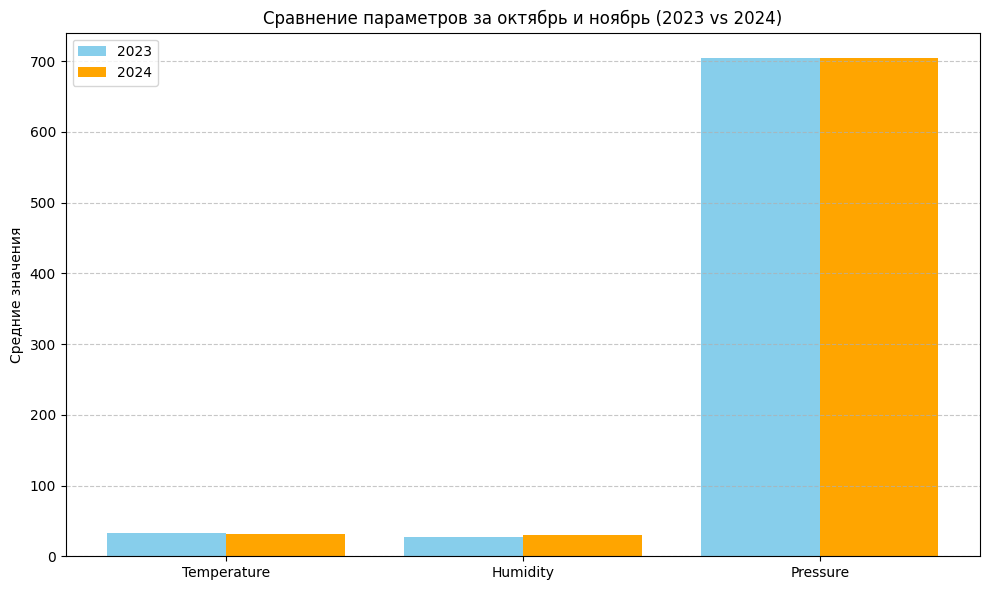

Параметр: Temperature
  Среднее значение в 2023: 32.55
  Среднее значение в 2024: 31.18
  Разница: -1.38

Параметр: Humidity
  Среднее значение в 2023: 26.71
  Среднее значение в 2024: 30.33
  Разница: 3.62

Параметр: Pressure
  Среднее значение в 2023: 704.74
  Среднее значение в 2024: 704.97
  Разница: 0.23



In [12]:
# Визуализация
parameters = list(comparison_results.keys())
values_2023 = [comparison_results[param]['2023_average'] for param in parameters]
values_2024 = [comparison_results[param]['2024_average'] for param in parameters]

x = range(len(parameters))  # Позиции для баров

plt.figure(figsize=(10, 6))
plt.bar(x, values_2023, width=0.4, label='2023', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], values_2024, width=0.4, label='2024', align='center', color='orange')
plt.xticks([i + 0.2 for i in x], parameters)
plt.ylabel('Средние значения')
plt.title('Сравнение параметров за октябрь и ноябрь (2023 vs 2024)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()

for param, results in comparison_results.items():
    print(f"Параметр: {param}")
    print(f"  Среднее значение в 2023: {results['2023_average']:.2f}")
    print(f"  Среднее значение в 2024: {results['2024_average']:.2f}")
    print(f"  Разница: {results['difference']:.2f}\n")